In [1]:
import sklearn
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create Circles

X, Y = make_circles(n_samples = n_samples,
                   noise = 0.03,
                   random_state = 42)

In [2]:
len(X), len(Y)

(1000, 1000)

In [3]:
print(X[:5])
print()
print(Y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

[1 1 1 1 0]


In [4]:
# Make DataFrames of Circle Data
import pandas as pd

circles = pd.DataFrame({"X1" : X[:, 0], 
                        "X2" : X[:, 1],
                        "label" : Y})


circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


# 1) Visualization

In [5]:
import matplotlib.pyplot as plt

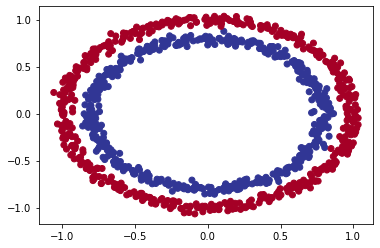

In [6]:
plt.scatter(x = circles.X1, y = circles.X2, c = circles.label, cmap = plt.cm.RdYlBu)
plt.show()

## 2) Check input and Output shapes

In [7]:
X.shape, Y.shape

((1000, 2), (1000,))

In [8]:
X_sample = X[0]
Y_sample = Y[0]

print(f"Values for one sample of X: {X_sample} and the same for Y: {Y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for Y: {Y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for Y: 1
Shapes for one sample of X: (2,) and the same for Y: ()


## 3) Turn data into tensors

In [9]:
import torch

In [10]:
print(X.dtype)
print(type(X))
print()
print(Y.dtype)
print(type(Y))

float64
<class 'numpy.ndarray'>

int64
<class 'numpy.ndarray'>


In [11]:
X, Y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0]))

See it is showing that data is in numpy array form.

Now convert it into Tensor.

In [12]:
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)

In [13]:
print(X.dtype)
print(type(X))
print()
print(Y.dtype)
print(type(Y))

torch.float64
<class 'torch.Tensor'>

torch.int64
<class 'torch.Tensor'>


In [14]:
X, Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]], dtype=torch.float64),
 tensor([1, 1, 1, 1, 0]))

Now you can see that data is in tensor array form.

### You can also see type of data, X is in torch.float64 and Y is in torch.int64. We need to convert it into torch.float32 to avoid further errors.

In [15]:
X = X.type(torch.float32)
Y = Y.type(torch.float32)

# 4) Split data into train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True)

In [18]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(800, 800, 200, 200)

In [19]:
X_test.dtype

torch.float32

# 5) Creating a Pytorch Workflow

To train a model, we need to setup some few things, as follows:-

1. Setup device agnostic code so our code will run on GPU if GPU is available else CPU.
2. Construct a model (by subclassing `nn.Module`).
3. Define a loss function and optimizer.
4. Create a Train and Test Loop

### 5.1. Make device agnostic code

In [20]:
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


/home/dev_ashish/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [21]:
X_train.shape

torch.Size([800, 2])

### 5.2. Constructing a Model 

In [22]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Create layers that are capable of handling the shapes of our data.
        # takes in 2 features and upscales it to 8 features.
        self.layer1 = nn.Linear(in_features = X_train.shape[1], out_features = 8) 
        
        # takes in 8 features as an input (output of last layer) and outputs a single feature (same shape as Y).
        self.layer2 = nn.Linear(in_features = 8, out_features = 1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x
    

model_0 = CircleModelV0().to(device) 

In [23]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.3636, -0.5057],
                      [ 0.6183, -0.4435],
                      [ 0.3868,  0.0643],
                      [-0.1661, -0.1717],
                      [ 0.6607, -0.4643],
                      [-0.1149,  0.6149],
                      [ 0.5234,  0.3056],
                      [-0.1428,  0.5184]])),
             ('layer1.bias',
              tensor([-0.6773,  0.6190,  0.0030,  0.7026, -0.2615,  0.0568, -0.0750, -0.5110])),
             ('layer2.weight',
              tensor([[ 0.2365, -0.0475, -0.2074, -0.2216, -0.2182, -0.0639, -0.3277, -0.1986]])),
             ('layer2.bias', tensor([0.1636]))])

In [24]:
X_test.shape

torch.Size([200, 2])

In [25]:
model_0(X_test).shape

torch.Size([200, 1])

### 5.3. Setup a loss function and optimizer

In [26]:
loss_fn = nn.BCEWithLogitsLoss()  # this has a sigmoid activation function builtin.

# loss_fn = nn.BCELoss(); requires inputs to have gone through the sigmoid 
# activation function prior to BCELoss.

In [27]:
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [28]:
# Calculate accuracy - writing custom accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 5.4. Creating a Train and Test Loop

To train our model, we need to build a training loop with the following steps:
1. Forward pass.
2. Calculate the Loss.
3. Optimizer zero grad.
4. Loss Backward (backpropogation).
5. Optimizer step (Gradient Descent)

Going from raw logits -> predictions probabilites -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilites** by passing them to some kind of activation function.
(e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking `argmax()`. 

In [29]:
# Example:- 
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
    y_preds = torch.round(torch.sigmoid(y_logits))
    
    
print(y_logits[:5])
print(y_preds[:5])

tensor([[ 0.0150],
        [-0.2160],
        [ 0.3731],
        [-0.0854],
        [-0.0195]])
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.]])


In [30]:
# Lets start:- 

torch.manual_seed(42)

# set the number of epochs
EPOCHS = 100

# Put data to target device, data should be on same device as our model is.
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

# Build training and evaluation loop
for epoch in range(EPOCHS):
    
    model_0.train()    # training mode ON
    
    # 1. Forward pass
    Y_logits = model_0(X_train).squeeze()  # removes extra 1 dim from tensor array
    Y_preds = torch.round(torch.sigmoid(Y_logits))  # turn logits -> pred probs using sigmoid -> pred labels
    
    
    # 2. Calculate loss and accuracy
    train_loss = loss_fn(Y_logits,   # our loss func is nn.BCEWithLogitsLoss (expects logits as an input).
                        Y_train)
    
    
    train_acc = accuracy_fn(y_true = Y_train, y_pred = Y_preds)
    
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss Backward (BackPropogation)
    train_loss.backward()
    
    # 5. Optimizer step (Gradient Descent)
    optimizer.step()
    
    
    
    
    ## Testing
    model_0.eval()
    with torch.inference_mode():
        
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        # 2. Caculate test loss/acc
        test_loss = loss_fn(test_logits, Y_test)
        
        test_acc = accuracy_fn(y_true = Y_test, y_pred = test_preds)
        
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
        

Epoch: 0 | Train Loss: 0.70731, Train Acc: 49.50 | Test Loss: 0.69663, Test Acc: 51.50%
Epoch: 10 | Train Loss: 0.70689, Train Acc: 49.50 | Test Loss: 0.69636, Test Acc: 51.50%
Epoch: 20 | Train Loss: 0.70648, Train Acc: 49.50 | Test Loss: 0.69611, Test Acc: 51.50%
Epoch: 30 | Train Loss: 0.70609, Train Acc: 49.50 | Test Loss: 0.69587, Test Acc: 52.00%
Epoch: 40 | Train Loss: 0.70572, Train Acc: 49.38 | Test Loss: 0.69564, Test Acc: 52.00%
Epoch: 50 | Train Loss: 0.70536, Train Acc: 49.38 | Test Loss: 0.69543, Test Acc: 52.00%
Epoch: 60 | Train Loss: 0.70501, Train Acc: 49.38 | Test Loss: 0.69522, Test Acc: 52.00%
Epoch: 70 | Train Loss: 0.70467, Train Acc: 49.38 | Test Loss: 0.69502, Test Acc: 52.00%
Epoch: 80 | Train Loss: 0.70434, Train Acc: 49.50 | Test Loss: 0.69483, Test Acc: 52.00%
Epoch: 90 | Train Loss: 0.70403, Train Acc: 49.50 | Test Loss: 0.69466, Test Acc: 52.00%


### As we can see, neither accuracy increased nor loss decreased, Why?? lets try to plot decision boundary and see why

In [31]:
from helper_functions import plot_decision_boundary

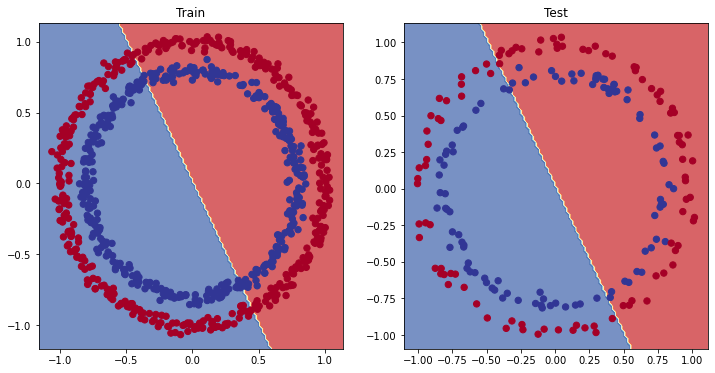

In [32]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, Y_test)

### Our data is circular but our linear model is trying to split data in middle that is why accuracy is almost 50%. Model needs to fit between both circles to be able to differentiate between both circles, but it is splitting in half. So what can we do to Improve our Model?

# Improving a Model (from a Model's Perspective)

- Add more layers - give model more chances to learn about patterns in the data means build larger models.
- Add more hidden units - we can go from 8 hidden units to 16 hidden units.
- Train for more epochs.
- Changing the Activation Function.
- Change the Learning Rate.
- Change the Loss Function

### These options are all from a model's perspective because they deal directly with the model, rather than the data

### Lets try to imporve model by:- 

    1) Adding more hidden units by 8 to 16.
    2) Increase the number of layers by 2 to 3.
    3) Increase no of epochs from 100 to 1000.

In [34]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 16)
        self.layer_2 = nn.Linear(in_features = 16, out_features = 8)
        self.layer_3 = nn.Linear(in_features = 8, out_features = 1)
    
    
    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return x
    
    
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
)

In [35]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]])),
             ('layer_1.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265])),
             ('layer_2.weight',
              tensor([[ 0.1270, -0.1524,

In [38]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [39]:
# Write a training and evaluation loop for model_1.

torch.manual_seed(42)

# set the number of epochs
EPOCHS = 1000

# Put data to target device, data should be on same device as our model is.
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)


# Build training and evaluation loop
for epoch in range(EPOCHS):
    
    model_1.train()    # training mode ON
    
    # 1. Forward pass
    Y_logits = model_1(X_train).squeeze()  # removes extra 1 dim from tensor array
    Y_preds = torch.round(torch.sigmoid(Y_logits))  # turn logits -> pred probs using sigmoid -> pred labels
    
    
    # 2. Calculate loss and accuracy
    train_loss = loss_fn(Y_logits,   # our loss func is nn.BCEWithLogitsLoss (expects logits as an input).
                         Y_train)
    
    
    train_acc = accuracy_fn(y_true = Y_train, y_pred = Y_preds)
    
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss Backward (BackPropogation)
    train_loss.backward()
    
    # 5. Optimizer step (Gradient Descent)
    optimizer.step()
    
    
    
    
    ## Testing
    model_1.eval()
    with torch.inference_mode():
        
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        # 2. Caculate test loss/acc
        test_loss = loss_fn(test_logits, Y_test)
        
        test_acc = accuracy_fn(y_true = Y_test, y_pred = test_preds)
        
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
        

Epoch: 0 | Train Loss: 0.69298, Train Acc: 51.12 | Test Loss: 0.69465, Test Acc: 46.00%
Epoch: 100 | Train Loss: 0.69298, Train Acc: 51.12 | Test Loss: 0.69466, Test Acc: 46.00%
Epoch: 200 | Train Loss: 0.69298, Train Acc: 51.12 | Test Loss: 0.69466, Test Acc: 46.00%
Epoch: 300 | Train Loss: 0.69298, Train Acc: 51.12 | Test Loss: 0.69466, Test Acc: 46.00%
Epoch: 400 | Train Loss: 0.69298, Train Acc: 51.12 | Test Loss: 0.69466, Test Acc: 46.00%
Epoch: 500 | Train Loss: 0.69298, Train Acc: 51.12 | Test Loss: 0.69466, Test Acc: 46.00%
Epoch: 600 | Train Loss: 0.69298, Train Acc: 51.12 | Test Loss: 0.69466, Test Acc: 46.00%
Epoch: 700 | Train Loss: 0.69298, Train Acc: 51.12 | Test Loss: 0.69466, Test Acc: 46.00%
Epoch: 800 | Train Loss: 0.69298, Train Acc: 51.12 | Test Loss: 0.69466, Test Acc: 46.00%
Epoch: 900 | Train Loss: 0.69298, Train Acc: 51.12 | Test Loss: 0.69466, Test Acc: 46.00%


### SAME RESULTS AS PREVIOUS MODEL

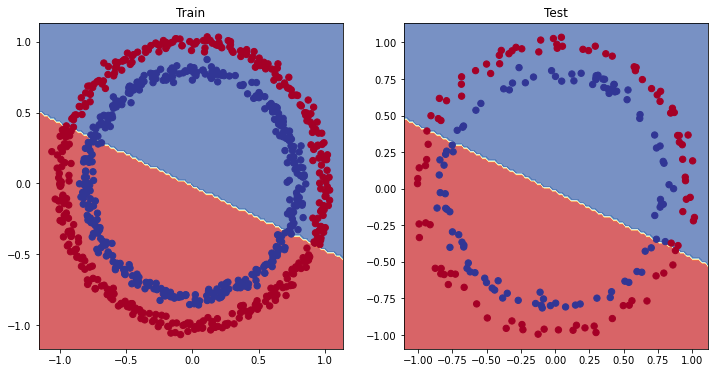

In [40]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, Y_test)

# The Missing Piece:- Non-Linearity

### recreating non-linear data (red and blue circles)

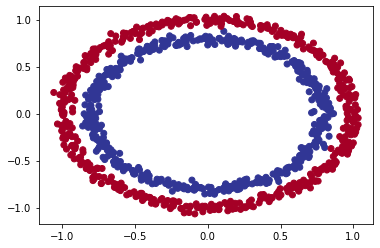

In [53]:
import sklearn
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create Circles

X, Y = make_circles(n_samples = n_samples,
                   noise = 0.03,
                   random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.RdYlBu)

In [54]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split


# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)


# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train[:5], Y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# Building a Model with a Non-Linearity

- Linear = straight line
- Non-Linear = non-straight lines

In [64]:
# Build a model with non-linear activation function

import torch.nn as nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 16)
        self.layer_2 = nn.Linear(in_features = 16, out_features = 8)
        self.layer_3 = nn.Linear(in_features = 8, out_features = 1)
        self.relu = nn.ReLU()   # Relu is non-linear activation function
        
    def forward(self, x):
        # Where should we put our non linear activation function?
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)
        
        return x
    
    
model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [69]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

## Training a model with non-linearity

In [70]:
torch.manual_seed(42)

X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)


EPOCHS = 3000

for epoch in range(EPOCHS):
    
    model_2.train()            # model training mode ON
    
    
    # 1. Forward pass
    Y_logits = model_2(X_train).squeeze()  # removes extra 1 dim from tensor array
    Y_preds = torch.round(torch.sigmoid(Y_logits))  # turn logits -> pred probs using sigmoid -> pred labels
    
    
    # 2. Calculate loss and accuracy
    train_loss = loss_fn(Y_logits,   # our loss func is nn.BCEWithLogitsLoss (expects logits as an input).
                         Y_train)
    
    
    train_acc = accuracy_fn(y_true = Y_train, y_pred = Y_preds)
    
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss Backward (BackPropogation)
    train_loss.backward()
    
    # 5. Optimizer step (Gradient Descent)
    optimizer.step()
    
    
    ### Testing
    
    model_2.eval()
    
    with torch.inference_mode():
        
        # 1. Forward pass
        test_logits = model_2(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        # 2. Caculate test loss/acc
        test_loss = loss_fn(test_logits, Y_test)
        
        test_acc = accuracy_fn(y_true = Y_test, y_pred = test_preds)
        
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")
        

Epoch: 0 | Train Loss: 0.61861, Train Acc: 68.12 | Test Loss: 0.63814, Test Acc: 65.50%
Epoch: 100 | Train Loss: 0.61456, Train Acc: 68.88 | Test Loss: 0.63437, Test Acc: 66.50%
Epoch: 200 | Train Loss: 0.61008, Train Acc: 70.62 | Test Loss: 0.63012, Test Acc: 66.50%
Epoch: 300 | Train Loss: 0.60517, Train Acc: 72.62 | Test Loss: 0.62533, Test Acc: 67.50%
Epoch: 400 | Train Loss: 0.59993, Train Acc: 74.88 | Test Loss: 0.62015, Test Acc: 69.00%
Epoch: 500 | Train Loss: 0.59432, Train Acc: 77.62 | Test Loss: 0.61463, Test Acc: 71.00%
Epoch: 600 | Train Loss: 0.58824, Train Acc: 80.62 | Test Loss: 0.60869, Test Acc: 75.00%
Epoch: 700 | Train Loss: 0.58173, Train Acc: 83.50 | Test Loss: 0.60231, Test Acc: 78.50%
Epoch: 800 | Train Loss: 0.57475, Train Acc: 85.12 | Test Loss: 0.59539, Test Acc: 81.00%
Epoch: 900 | Train Loss: 0.56726, Train Acc: 87.75 | Test Loss: 0.58791, Test Acc: 83.00%
Epoch: 1000 | Train Loss: 0.55924, Train Acc: 89.00 | Test Loss: 0.57988, Test Acc: 84.00%
Epoch: 1100

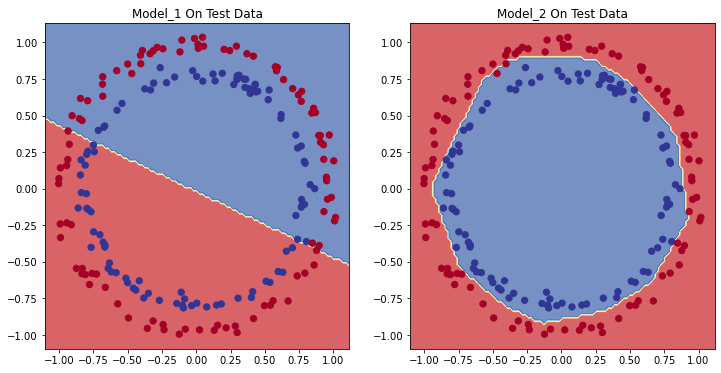

In [81]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title("Model_1 On Test Data")
plot_decision_boundary(model_1, X_test, Y_test)   # model_1 = dont have non-linearity
plt.subplot(1, 2, 2)
plt.title("Model_2 On Test Data")
plot_decision_boundary(model_2, X_test, Y_test)     # model_2 = has non-linearity

# We got better results with non-linear activation function as model is able to differentiate between both circles.

Lets check preductions on test data and compare predicted labels with ground truths

In [74]:
model_2.eval()
with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    Y_preds = torch.round(torch.sigmoid(test_logits))
        
Y_preds[:10], Y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))